In [12]:
# Import the necessary libraries that will be used in this code - pandas for data manipulation, numpy for numerical calculations, and seaborn for data visualization. The collections library is also imported to use the Counter function.
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [13]:
# load dataset
data = pd.read_csv("Resources/online_shoppers_intention.csv")
X = data.copy()

In [14]:
# display top 5 rows of the dataset
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Counter({False: 10422, True: 1908})


c:\Users\61415\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Revenue', ylabel='count'>

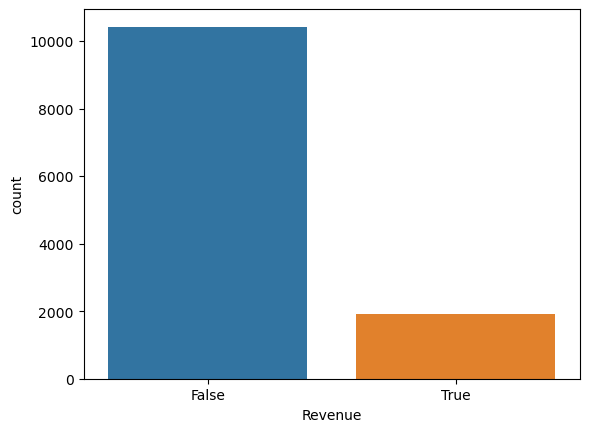

In [15]:
# display the count of unique values of 'Revenue' column and visualize it using a countplot
print(Counter(X['Revenue']))
sns.countplot(X['Revenue'])

### The get_dummies method from pandas is used to one-hot encode categorical variables in the dataset (VisitorType and Month). The astype method is used to convert the Weekend and Revenue columns to integer data types.

In [16]:
# create dummy variables for 'VisitorType' and 'Month' columns and convert 'Weekend' and 'Revenue' columns to int data type
df = pd.get_dummies(X, columns=['VisitorType', 'Month'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [17]:
# define a function to calculate the average time spent by a user on each category (administrative, informational, and product related)
def AvgMinutes(Count, Duration):
    if Duration == 0:
        output = 0
    elif Duration != 0:
        output = float(Duration)/float(Count)
    return output

In [18]:
# apply the 'AvgMinutes' function to calculate the average time spent by a user on each category and create new features
Columns = [['Administrative', 'Administrative_Duration'], 
           ['Informational', 'Informational_Duration'], 
           ['ProductRelated', 'ProductRelated_Duration']]

In [19]:
for col in Columns:
    X['Avg'+col[0]] = X.apply(lambda x: AvgMinutes(Count=x[col[0]], Duration=x[col[1]]), axis=1)


In [20]:
# drop the original columns used to calculate average time spent
X.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'], axis=1, inplace=True)


In [22]:
from sklearn.model_selection import train_test_split
# split data into train and test sets
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
# scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Dropout

#Build a neural network model using Keras
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [29]:
# compile the model and fit it to the training data
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

NameError: name 'model' is not defined

In [ ]:
# make predictions on the test data and evaluate the model's performance
y_pred = model.predict_classes(X_test_scaled)
result_dict = summarize_classification(y_test, y_pred)
print(result_dict)